## Test MLP on ECG dataset
Based on the Week14_Task02_Solution

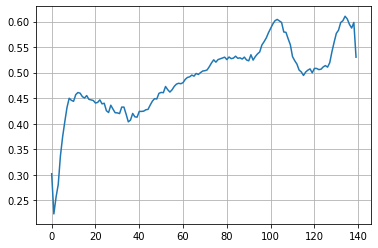

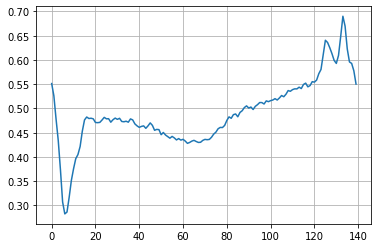

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Activation

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

#Load the dataset
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=30)

# Normalize to [0, 1]
# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()
# plot data
plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()

# Define MLP models

Epoch 1/30
250/250 [==============================] - 1s 977us/step - loss: 0.2156 - accuracy: 0.6919
Epoch 2/30
250/250 [==============================] - 0s 971us/step - loss: 0.0938 - accuracy: 0.9363
Epoch 3/30
250/250 [==============================] - 0s 955us/step - loss: 0.0514 - accuracy: 0.9530
Epoch 4/30
250/250 [==============================] - 0s 992us/step - loss: 0.0409 - accuracy: 0.9570
Epoch 5/30
250/250 [==============================] - 0s 958us/step - loss: 0.0331 - accuracy: 0.9639
Epoch 6/30
250/250 [==============================] - 0s 975us/step - loss: 0.0313 - accuracy: 0.9649
Epoch 7/30
250/250 [==============================] - 0s 982us/step - loss: 0.0265 - accuracy: 0.9715
Epoch 8/30
250/250 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9726
Epoch 9/30
250/250 [==============================] - 0s 964us/step - loss: 0.0242 - accuracy: 0.9752
Epoch 10/30
250/250 [==============================] - 0s 983us/step - loss: 0.0239 

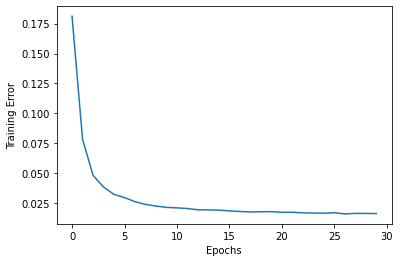

In [103]:
hidensize=64

mlp_model = keras.Sequential()
mlp_model.add(keras.Input(shape=(140,)))
mlp_model.add(keras.layers.Dense(hidensize, activation='sigmoid', 
                activity_regularizer=keras.regularizers.l1(10e-5)))
mlp_model.add(keras.layers.Dense(2, activation='softmax'))
rmsprop=keras.optimizers.RMSprop(learning_rate=0.0001)
mlp_model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(train_labels, num_classes=2)

# Train the model, iterating on the data in batches of 32 samples
hist=mlp_model.fit(train_data, one_hot_labels, epochs=30, batch_size=16)

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');        

# Test

In [104]:
y_pred=np.argmax(mlp_model.predict(test_data), axis=1)
print("F1 Score:  ", f1_score(test_labels, y_pred, average="macro"))
print("Precision: ", precision_score(test_labels, y_pred, average="macro"))
print("Recall:    ", recall_score(test_labels, y_pred, average="macro"))
print("Accuracy:  ", np.mean((test_labels==y_pred)*1.0))

F1 Score:   0.9867128785935275
Precision:  0.9881147608192984
Recall:     0.9854815098740413
Accuracy:   0.987
